## 1. Install Required Libraries
##### Install the scikit-learn library, which is necessary for performing K-Means clustering.

## 2. Import Libraries
##### Import the necessary libraries for data manipulation, visualization, and clustering.

In [1]:
!pip install --upgrade pip
!pip install openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans # Import KMeans from sklearn.cluster

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 42.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


## 3. Mount Google Drive
##### Mount Google Drive to access files stored there.

In [2]:
# Retry loading the Excel file after installing openpyxl
file_path = ("/work/website_traffic.docx-EmbeddedFile.xlsx")
sheet_names = pd.ExcelFile(file_path).sheet_names
sheet_names

['Sheet2']

## 4. Load the Dataset
##### Load the dataset from an Excel file.

In [4]:
# Load the contents of the first sheet to explore its data
df = pd.read_excel(file_path, sheet_name='Sheet2')
df

,user_id,session_id,timestamp,page_url,event_type,traffic_source,campaign_id,device_type,time_on_site,bounce
0,1,A123,2024-07-2010:00:00,/,page_view,organic_search,NaN,desktop,300,0
1,2,B456,2024-07-2010:05:00,/products,page_view,paid_advertising,CAMP123,mobile,120,0
2,3,C789,2024-07-2010:10:00,/,page_view,social_media,NaN,tablet,60,1
3,1,D012,2024-07-2010:15:00,/cart,add_to_cart,organic_search,NaN,desktop,180,0
4,4,E345,2024-07-2010:20:00,/products/shoes,page_view,paid_advertising,CAMP123,mobile,90,0
5,5,F678,2024-07-2010:25:00,/,page_view,direct,NaN,desktop,240,0
6,2,G901,2024-07-2010:30:00,/checkout,purchase,paid_advertising,CAMP123,mobile,150,0
7,6,H234,2024-07-2010:35:00,/contact,page_view,organic_search,NaN,tablet,45,1
8,7,I567,2024-07-2010:40:00,/products/bags,page_view,social_media,NaN,desktop,180,0
9,3,J890,2024-07-2010:45:00,/,page_view,social_media,NaN,mobile,30,1


## 5. Initial Data Exploration
##### Explore the dataset by checking its dimensions, displaying the first few rows, viewing the summary, and checking for missing values.

In [5]:
# View Dimensions of dataset
print("Dimensions of dataset:")
print(df.shape)  # df.shape

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())  # df.head()

# View Summary of the dataset
print("Summary of the dataset:")
print(df.describe())  # df.info()

# Check for missing values
print("Missing values:")
print(df.isnull().sum())  # df.isnull().sum()

Dimensions of dataset:
(25, 10)
First few rows of the dataframe:
   user_id session_id           timestamp         page_url   event_type  \
0        1       A123  2024-07-2010:00:00                /    page_view   
1        2       B456  2024-07-2010:05:00        /products    page_view   
2        3       C789  2024-07-2010:10:00                /    page_view   
3        1       D012  2024-07-2010:15:00            /cart  add_to_cart   
4        4       E345  2024-07-2010:20:00  /products/shoes    page_view   

     traffic_source campaign_id device_type  time_on_site  bounce  
0    organic_search         NaN     desktop           300       0  
1  paid_advertising     CAMP123      mobile           120       0  
2      social_media         NaN      tablet            60       1  
3    organic_search         NaN     desktop           180       0  
4  paid_advertising     CAMP123      mobile            90       0  
Summary of the dataset:
         user_id  time_on_site     bounce
count  25.

## 6. Data Cleaning and Preprocessing
##### Clean and preprocess the data by handling missing values, transforming the timestamp column, and creating new features.

In [6]:
# Clean the data by handling missing values
df['campaign_id'].fillna('No Campaign', inplace=True)

# Transform the timestamp column into a datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d%H:%M:%S', errors='coerce')

# Create new features: hour and day_of_week extracted from timestamp
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Calculate conversion as a binary variable: 1 if event_type contains "purchase", 0 otherwise
df['conversion'] = np.where(df['event_type'] == 'purchase', 1, 0)

# Display the first few rows of the cleaned dataframe
print("First few rows of the cleaned dataframe:")
df.head()

First few rows of the cleaned dataframe:


,user_id,session_id,timestamp,page_url,event_type,traffic_source,campaign_id,device_type,time_on_site,bounce,hour,day_of_week,conversion
0,1,A123,2024-07-20 10:00:00,/,page_view,organic_search,No Campaign,desktop,300,0,10,5,0
1,2,B456,2024-07-20 10:05:00,/products,page_view,paid_advertising,CAMP123,mobile,120,0,10,5,0
2,3,C789,2024-07-20 10:10:00,/,page_view,social_media,No Campaign,tablet,60,1,10,5,0
3,1,D012,2024-07-20 10:15:00,/cart,add_to_cart,organic_search,No Campaign,desktop,180,0,10,5,0
4,4,E345,2024-07-20 10:20:00,/products/shoes,page_view,paid_advertising,CAMP123,mobile,90,0,10,5,0


## 7. Descriptive Statistics
##### Calculate descriptive statistics for the time_on_site column.

In [7]:
# Calculate descriptive statistics for numerical columns (time_on_site)
df['time_on_site'].describe()

count     25.000000
mean     133.200000
std       65.889428
min       30.000000
25%       90.000000
50%      120.000000
75%      180.000000
max      300.000000
Name: time_on_site, dtype: float64

## 8. Exploratory Data Analysis (EDA)
### Distribution of Traffic Source(Traffic Source)
##### Visualize the distribution of traffic sources.

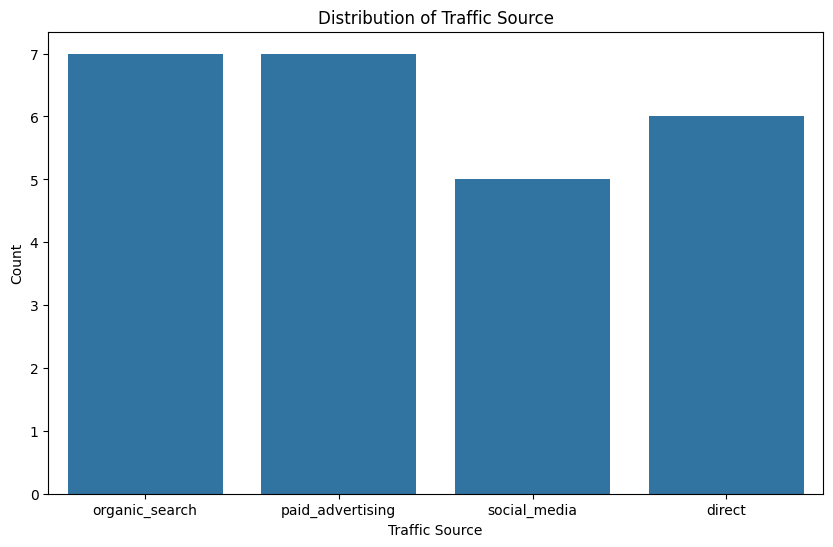

'\n###Distribution of Traffic Source\n#####Visualize the distribution of traffic sources.\n'

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='traffic_source')
plt.title('Distribution of Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Count')
plt.show()

"""
###Distribution of Traffic Source
#####Visualize the distribution of traffic sources.
"""

### Distribution of Device Type
##### Visualize the distribution of device types.

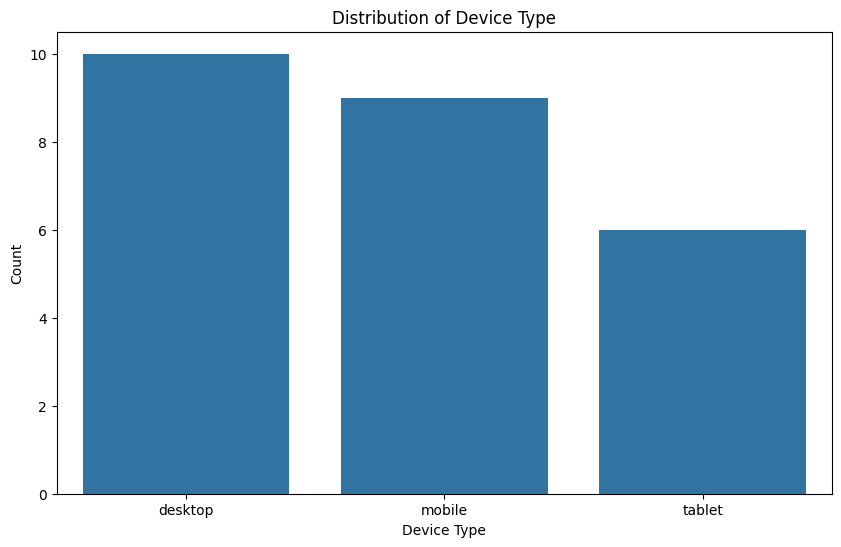

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='device_type')
plt.title('Distribution of Device Type')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.show()

### Distribution of Time on Site
##### Visualize the distribution of time on site using histogram.

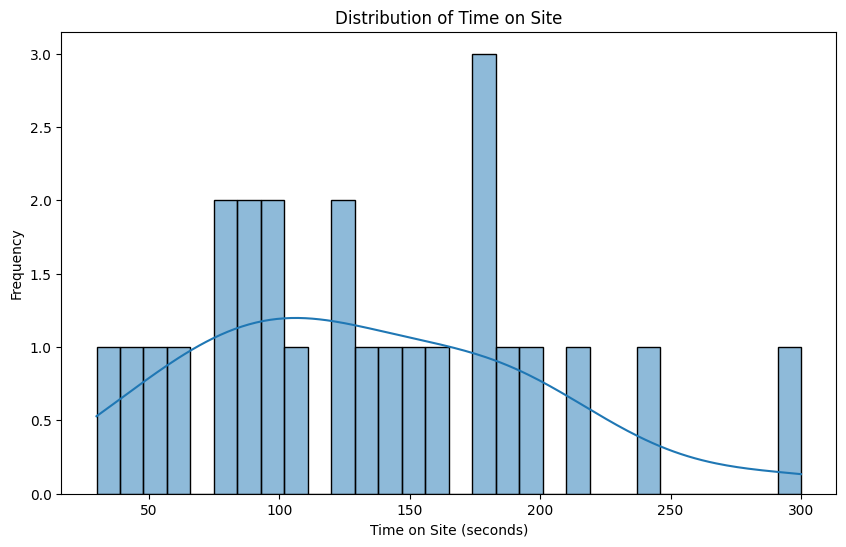

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='time_on_site', bins=30, kde=True)
plt.title('Distribution of Time on Site')
plt.xlabel('Time on Site (seconds)')
plt.ylabel('Frequency')
plt.show()

### Distribution of Bounce
##### Visualize the distribution of bounce rates.

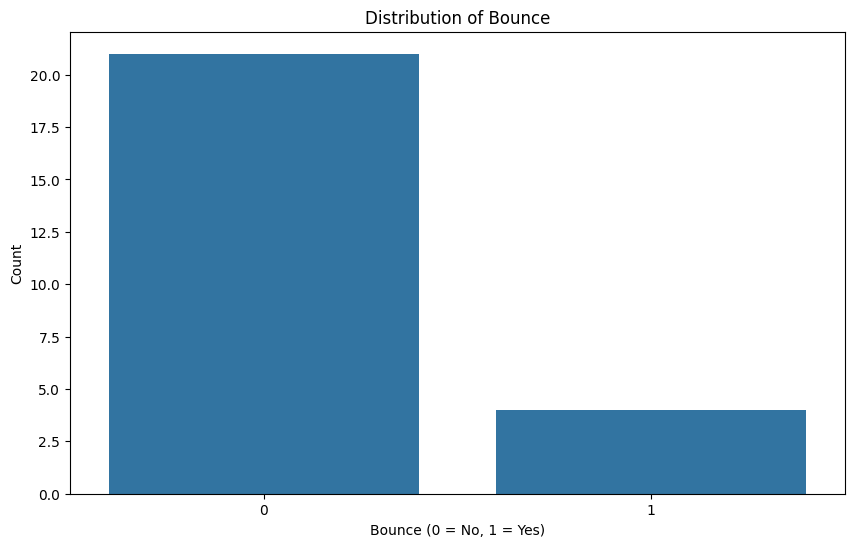

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bounce')
plt.title('Distribution of Bounce')
plt.xlabel('Bounce (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### Distribution of Conversion
##### Visualize the distribution of conversion rates.

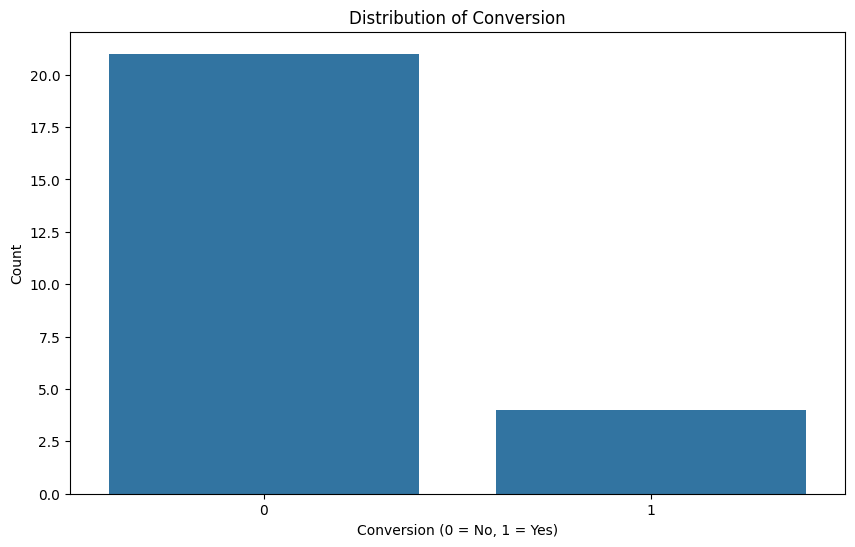

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='conversion')
plt.title('Distribution of Conversion')
plt.xlabel('Conversion (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### Average Time on Site
##### Calculate the average time on site for different traffic sources and device types.

In [13]:
avg_time_on_site_traffic_source = df.groupby('traffic_source')['time_on_site'].mean()
avg_time_on_site_device_type = df.groupby('device_type')['time_on_site'].mean()

print("Average Time on Site by Traffic Source:")
print(avg_time_on_site_traffic_source)
print("\nAverage Time on Site by Device Type:")
print(avg_time_on_site_device_type)

Average Time on Site by Traffic Source:
traffic_source
direct              160.000000
organic_search      138.571429
paid_advertising    134.285714
social_media         92.000000
Name: time_on_site, dtype: float64

Average Time on Site by Device Type:
device_type
desktop    175.000000
mobile      99.444444
tablet     114.166667
Name: time_on_site, dtype: float64


### Bounce Rate
##### Calculate the bounce rate for different traffic sources and device types.

In [14]:
bounce_rate_traffic_source = df.groupby('traffic_source')['bounce'].mean()
bounce_rate_device_type = df.groupby('device_type')['bounce'].mean()

print("Bounce Rate by Traffic Source:")
print(bounce_rate_traffic_source)
print("\nBounce Rate by Device Type:")
print(bounce_rate_device_type)

Bounce Rate by Traffic Source:
traffic_source
direct              0.000000
organic_search      0.142857
paid_advertising    0.000000
social_media        0.600000
Name: bounce, dtype: float64

Bounce Rate by Device Type:
device_type
desktop    0.100000
mobile     0.111111
tablet     0.333333
Name: bounce, dtype: float64


### Conversion Rate
##### Calculate the conversion rate for different traffic sources and campaign IDs.

In [15]:
conversion_rate_traffic_source = df.groupby('traffic_source')['conversion'].mean()
conversion_rate_campaign_id = df.groupby('campaign_id')['conversion'].mean()

print("Conversion Rate by Traffic Source:")
print(conversion_rate_traffic_source)
print("\nConversion Rate by Campaign ID:")
print(conversion_rate_campaign_id)

Conversion Rate by Traffic Source:
traffic_source
direct              0.166667
organic_search      0.000000
paid_advertising    0.285714
social_media        0.200000
Name: conversion, dtype: float64

Conversion Rate by Campaign ID:
campaign_id
CAMP123        0.250000
CAMP456        0.333333
No Campaign    0.111111
Name: conversion, dtype: float64


## 9. Visualizations to Support Findings
### Number of Sessions for Each Traffic Source
##### Visualize the number of sessions for each traffic source.

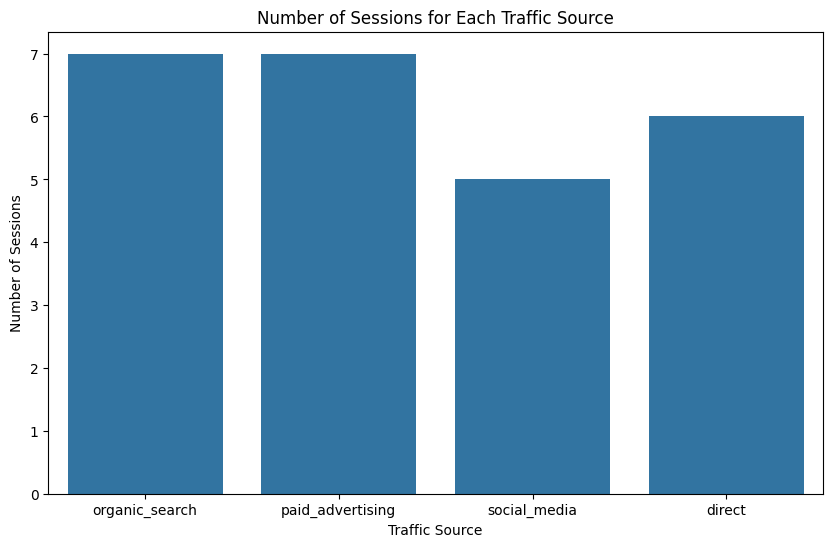

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='traffic_source')
plt.title('Number of Sessions for Each Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Number of Sessions')
plt.show()

### Distribution of Device Type
##### Visualize the distribution of device types using a pie chart.

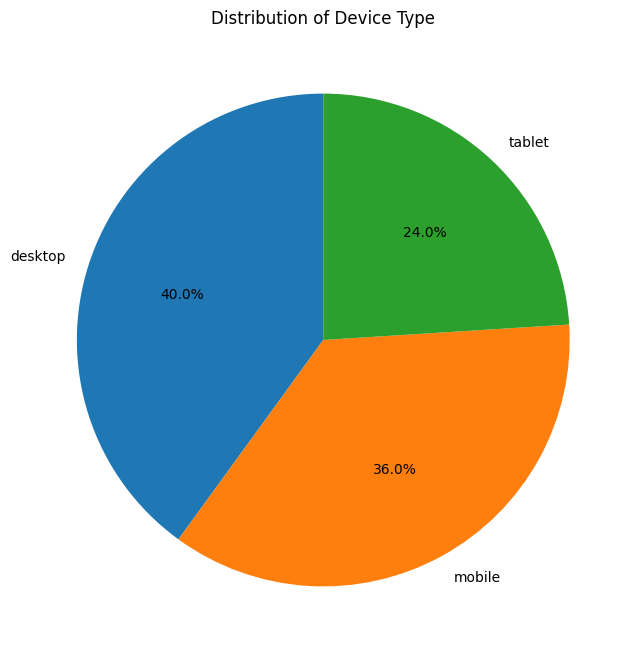

In [17]:
device_type_counts = df['device_type'].value_counts()
plt.figure(figsize=(8, 8))
device_type_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Device Type')
plt.ylabel('')
plt.show()

### Hourly Website Traffic
##### Visualize hourly website traffic using a line chart.

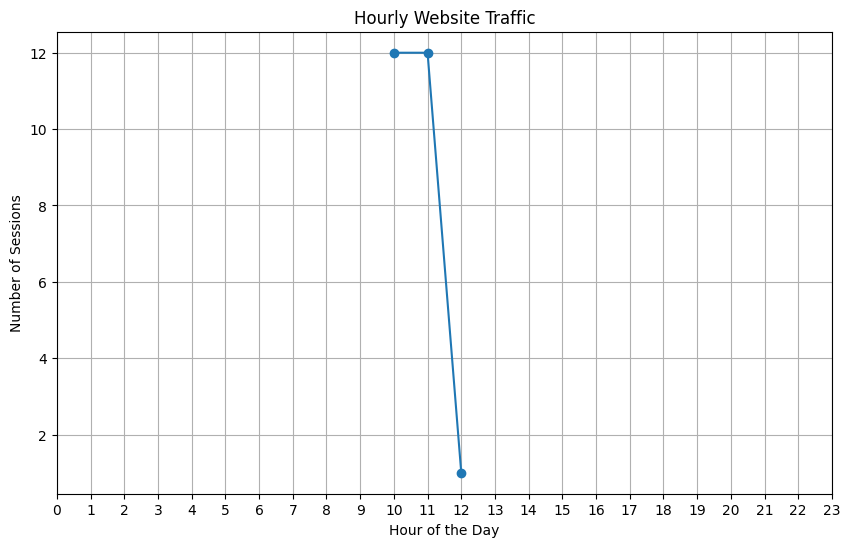

In [18]:
hourly_traffic = df.groupby('hour').size()
plt.figure(figsize=(10, 6))
hourly_traffic.plot(kind='line', marker='o')
plt.title('Hourly Website Traffic')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sessions')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Average Time on Site for Different Traffic Sources
##### Visualize the average time on site for different traffic sources using a bar chart.

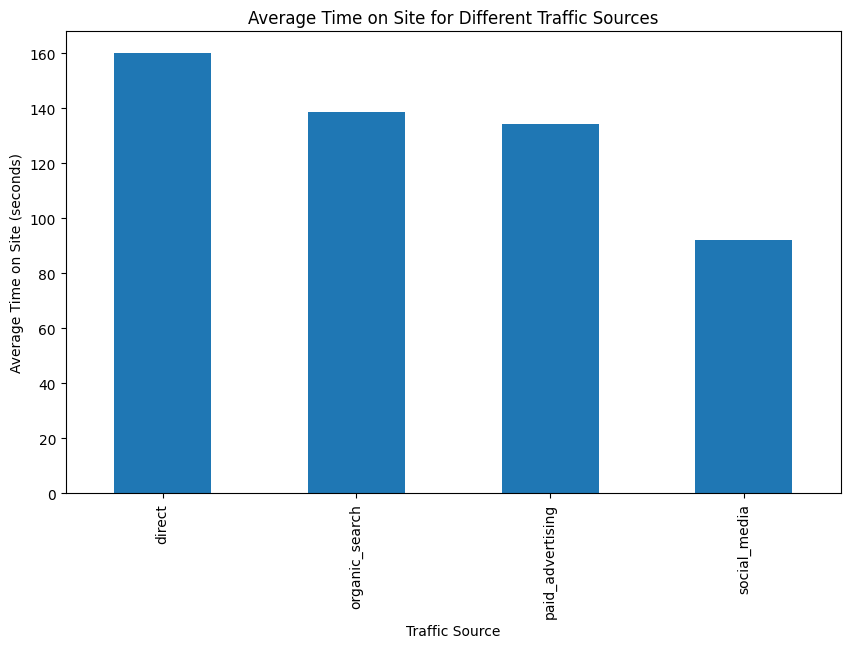

In [19]:
plt.figure(figsize=(10, 6))
avg_time_on_site_traffic_source.plot(kind='bar')
plt.title('Average Time on Site for Different Traffic Sources')
plt.xlabel('Traffic Source')
plt.ylabel('Average Time on Site (seconds)')
plt.show()

### Conversion Rates for Different Campaign IDs
##### Visualize the conversion rates for different campaign IDs using a bar chart.

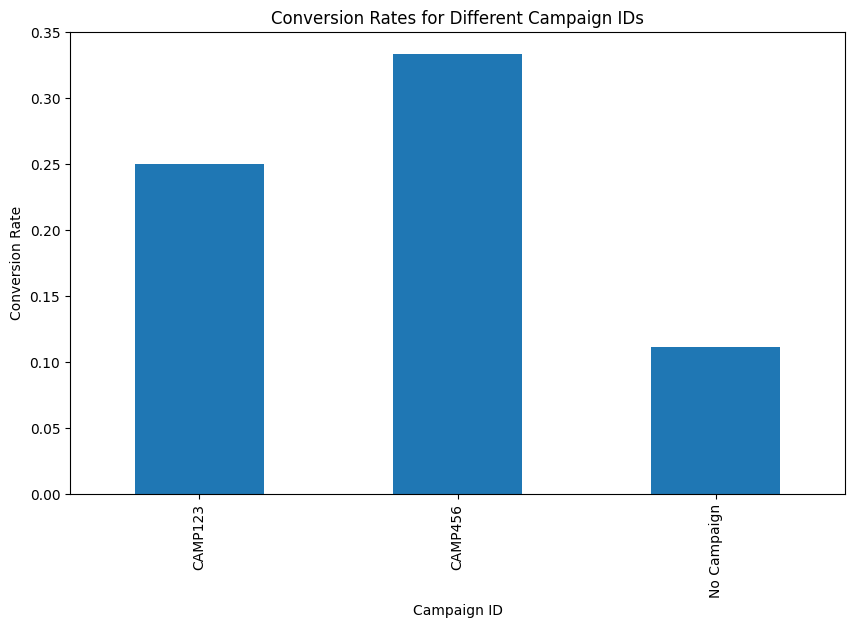

In [20]:
plt.figure(figsize=(10, 6))
conversion_rate_campaign_id.plot(kind='bar')
plt.title('Conversion Rates for Different Campaign IDs')
plt.xlabel('Campaign ID')
plt.ylabel('Conversion Rate')
plt.show()

## 10. Additional Analysis
### Correlation Heatmap
##### Visualize the correlation between key variables using a heatmap.

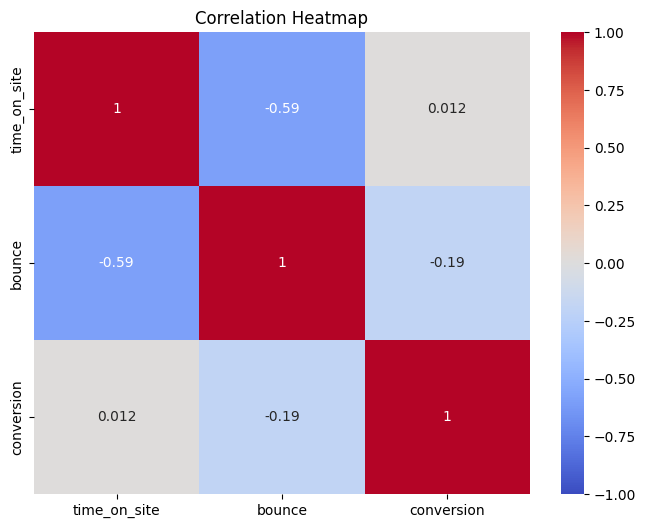

In [21]:
correlation_matrix = df[['time_on_site', 'bounce', 'conversion']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Pairplot of Key Variables
##### Visualize relationships between key variables using a pairplot.

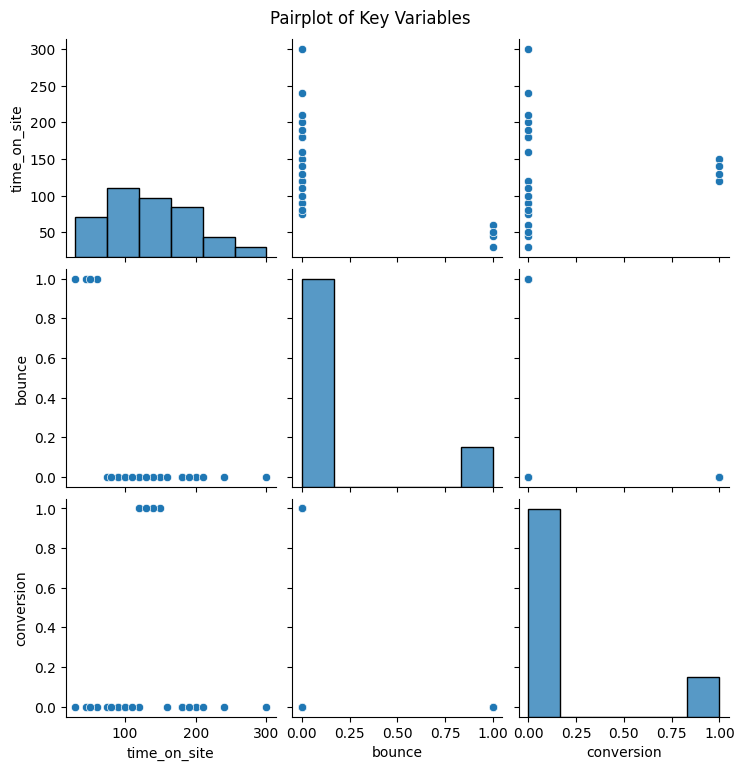

In [22]:
sns.pairplot(df[['time_on_site', 'bounce', 'conversion']])
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

## 11. User Segmentation Using K-Means Clustering
### Calculate Page Views per Session
##### Calculate the number of page views per session and handle missing values.

In [23]:
page_views = df[df['event_type'] == 'page_view'].groupby('session_id').size().reset_index(name='page_views')
df = df.merge(page_views, on='session_id', how='left')

# Fill NaN values in page_views with 0
df['page_views'].fillna(0, inplace=True)


### Perform K-Means Clustering
##### Perform K-Means clustering based on `time_on_site`, `page_views`, and `conversion`.

In [24]:
# Select features for clustering
features = df[['time_on_site', 'page_views', 'conversion']]

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

### Visualize Clusters
##### Visualize the clusters using a scatter plot.

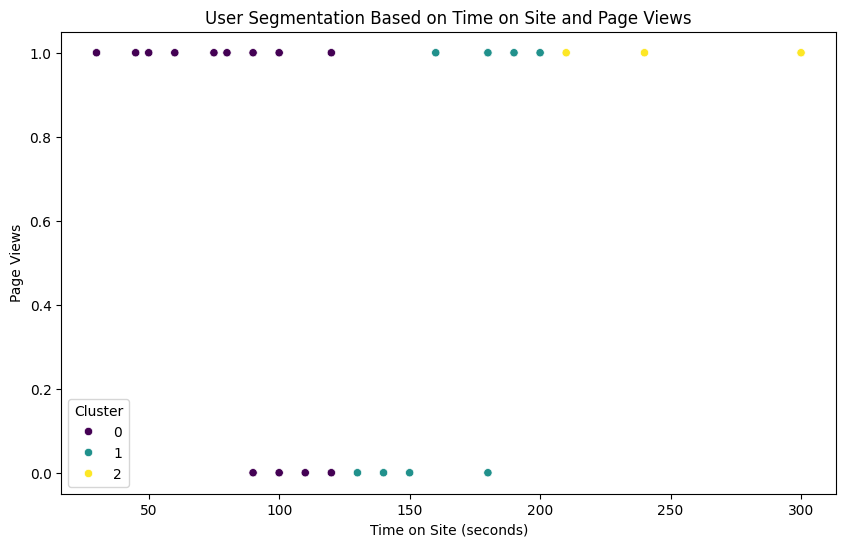

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='time_on_site', y='page_views', hue='cluster', palette='viridis')
plt.title('User Segmentation Based on Time on Site and Page Views')
plt.xlabel('Time on Site (seconds)')
plt.ylabel('Page Views')
plt.legend(title='Cluster')
plt.show()

### Display Cluster Centers
##### Display the centers of the clusters.

In [26]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[8.23076923e+01 6.92307692e-01 7.69230769e-02]
 [1.67777778e+02 5.55555556e-01 3.33333333e-01]
 [2.50000000e+02 1.00000000e+00 2.77555756e-17]]


> create a summary report, that answers what, why, what you did, what the current data tells you, what model you used and why and what insights you found, etc . keep this non technical as you be presenting to a stakeholder not a technocal person. use guide below:This video, we are going to exemplify how we can apply data analysis in the business.

And we'll do that by analyzing a case study.

So we're going to see targets predictive modeling case.

So Target Corporation which is a leading American retailer retailer sought to enhance its marketing

strategies by predicting customer behaviors.

Their goal was to identify customers in the early stages of pregnancy based on their shopping habits,

allowing target to send relevant offers and coupons, thereby securing customer loyalty during a crucial

life event.

What did they do regarding the data collection?

They collected data on the shopping habits, including purchase history of specific products that are

known to be correlated with pregnancy, such as unscented lotions, dietary supplements, and certain

types of vitamins.

Then, using predictive analysis, they analyze the collected data to score customers on their likelihood

of being pregnant.

The model considers the type of products purchased.

Purchase frequencies and change in shopping behaviors.

Target likely used a variety of statistical models and machine learning algorithms to analyze customer

data.

These models would identify patterns and correlations between certain products, purchases, and the

likelihood of a customer being pregnant.

This analysis helped them to segment customers into groups based on predicted stages of their pregnancy.

This segmentation allowed for a more targeted and timely Primarily marketing efforts regarding the implementation

and outcome of all this target.

Use the insights from the predictive model to send customized marketing and coupons to customers identified

as likely pregnancy.

Pregnant.

There were privacy concerns.

Obviously.

This initiative sparked discussions about privacy and ethics in marketing.

Highlighting the fine line between personalized marketing and invasion of privacy, target had to navigate

these concerns carefully, ensuring that they did not alienate customers.

Lessons that we can take from this so this targets use of predictive modeling, showcases the power

of data science in crafting highly personalized marketing strategies.

There are also ethical Considerations on the importance of, uh, maintaining customer privacy and the

use of data.

And also by applying predictive analysis, we can see with this example how businesses can gain a competitive

advantage over their competitors by anticipating the customer needs and behaviors and leading to more

effective and efficient marketing efforts.

So wrapping up target's approach to predictive modeling exemplifies the transformative potential of

data sciences in business.

By leveraging jet analytics, companies can uncover deep insights into customer behavior, enabling

them to anticipate needs and tailor marketing efforts accordingly.

However, this great power comes with the responsibility to use data ethically and respect the consumers.

Privacy.

Ethics is very important, particularly when related with data science projects.

So projects that involve predictive modeling and personalized marketing raises a lot of ethical considerations.

In this case, it's this case that we've just seen about target.

It's a good example that illustrates the complexities surrounding the privacy and data usage regarding

privacy concerns.

We have intrusiveness.

So target model was able to infer very sensitive information if people were pregnant or not.

So this raises concerns about the intrusiveness of data science applications where individuals may feel

their privacy is invaded without their explicit Concerned.

Then we have consent and transparency.

A key ethical issue is whether the customers are aware or not.

And if they consent or not, the extent of data collection and analysis.

So transparency about data usage policy and the purpose behind the data collection is crucial for ethical

data science practices.

As for the data usage, we have the purpose of data collection.

This means the this is the intent behind data collection and analysis should be clearly defined and

ethical.

Ethically justified we have data minimization and retention.

So ethical data practice involves collecting only the necessary data that is needed for a specific purpose

to minimize potential risks to privacy.

Regarding ethical frameworks and guidelines, we should develop ethical guidelines so businesses that

are employing data science must have their own frameworks for data science to secure all ethical aspects.

Then we have the regulatory compliance.

So businesses should be on the safe side and should comply with things like the General Data Protection

Regulation in Europe that emphasizes individual rights over the personal data.

Then we have to balance innovation with ethics.

And this is related to stakeholder engagement.

So engaging with stakeholders that includes customers Ethicists.

Legal experts can help in understanding the ethical implications of data science, and we have to consider

ethics as a competitive advantage.

So ethically responsible data science practices can serve as a competitive advantage as they build trust

between the customers and the companies.

So this discussion around targets predictive modeling.

Modeling underscores the importance of ethical considerations as businesses increasingly rely on data

analytics for strategic decision making.

They must navigate and navigate this fine line between leveraging data for business insights and and

respecting data privacy.

And they should develop ethical frameworks that ensure transparency and regulatory compliance.

What: The purpose of our analysis was to understand user behavior on the e-commerce website, identify key patterns, and segment users to improve marketing strategies and decision-making. We used customer session data, encompassing information such as traffic sources, device types, time spent on the website, and user interactions such as purchases or bounce rates.

Why: In today's competitive landscape, businesses must focus on tailoring their marketing and improving user engagement. By understanding customer segmentation and behavior patterns, we can optimize marketing efforts, curate relevant offers, and focus on high-impact strategies that drive conversions. Moreover, ethical data usage ensures that such initiatives do not compromise trust.

What We Did:
1. **Data Collection and Exploration**: We analyzed session logs, including traffic sources and device interaction, to establish a deep understanding of user activities.
2. **Data Cleaning and Feature Generation**: Missing data points, such as campaign IDs, were handled, and features such as session hour, bounce, conversion, and page views were enriched for further insights.
3. **Exploratory Analysis**: We examined trends in bounce rates, time on site, conversion by source, and other key metrics to uncover behavioral patterns.
4. **User Segmentation via Clustering**: To better target strategies, we applied a clustering algorithm (K-Means) based on critical behaviors such as session time, page views, and conversion rates.

Key Insights from Current Data:
1. Organic search brought a large volume of users but had low conversion rates, suggesting a need to re-target efforts.
2. Paid advertising drove conversions effectively, particularly when linked to campaigns like "CAMP456."
3. Mobile users visited less and bounced more than desktop users, indicating an area for improved mobile site experiences.
4. Sessions with longer time on the site and higher page views tended to yield higher conversion probabilities.

Model Used and Why: We used K-Means Clustering for user segmentation. This method enables grouping users based on distinct behavioral patterns, providing actionable insights to focus marketing strategies on specific client clusters. The three key clusters identified represented varying engagement and conversion tendencies, helping tailor strategies to low-engagement or high-conversation groups.

Findings:
1. High-value clusters, representing longer site-time users with multiple interactions, should be prioritized for offers or loyalty discounts.
2. Low-engagement clusters need intervention through improved site design or personalized recommendations.
3. Campaigns linked to specific user behaviors, such as targeted advertising, showed effective results, underscoring the value of focused investments.

In summary, this project highlights how analyzing user behavior can improve digital customer engagement. Ethically using such data is essential to maintaining user trust while booking higher conversions. The insights gained here can directly inform strategic shifts that increase efficiency and protect data integrity.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=360ce8b9-ca56-4969-a7c6-2b4d3b309009' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>